In [9]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import datetime
from scipy.stats import pearsonr
import networkx as nx

In [33]:
df = pd.read_csv('GTD Database - global_terror_2.csv')
# Load the data into a DataFrame
dfh = pd.read_csv('gtd_clean_v2.csv', encoding='ISO-8859-1')

In [35]:
df.head(5)

,iyear,imonth,iday,country,country_txt,region,region_txt,city,latitude,longitude,attacktype1,attacktype1_txt,nkill,weaptype1_txt,provstate,targtype1_txt,natlty1_txt,gname,propextent_txt
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,Assassination,1,Unknown,National,Private Citizens & Property,Dominican Republic,MANO-D,NaN
1,1970,0,0,130,Mexico,1,North America,Mexico city,19.371887,-99.086624,6,Hostage Taking (Kidnapping),0,Unknown,Federal,Government (Diplomatic),Belgium,23rd of September Communist League,NaN
2,1970,1,0,160,Philippines,5,Southeast Asia,Unknown,15.478598,120.599741,1,Assassination,1,Unknown,Tarlac,Journalists & Media,United States,Unknown,NaN
3,1970,1,0,78,Greece,8,Western Europe,Athens,37.997490,23.762728,3,Bombing/Explosion,-1,Explosives,Attica,Government (Diplomatic),United States,Unknown,NaN
4,1970,1,0,101,Japan,4,East Asia,Fukouka,33.580412,130.396361,7,Facility/Infrastructure Attack,-1,Incendiary,Fukouka,Government (Diplomatic),United States,Unknown,NaN


In [ ]:
# Select the desired columns
tmp = dfh[['intl_ideological_attack', 'intl_logistical_attack',
          'part_of_multiple_attacks', 'n_peace_keepers', 'net_migration',
          'refugee_asylum', 'refugee_origin', 'gdp_per_capita', 'arms_import',
          'arms_export', 'conflict_index', 'population', 'extended',
          'nwound', 'nkill', 'suicide_attack', 'attack_success']]

In [17]:
# Drop rows with missing values for complete cases
tmp = tmp.dropna()

In [19]:
# Calculate the correlation matrix using Pearson method
m = tmp.corr(method='pearson')

In [21]:
# Get rid of all non-significant correlations
ctest = np.tril(np.ones_like(m)) - np.eye(len(m))
p_values = np.empty_like(m)
for i in range(len(m)):
    for j in range(i + 1, len(m)):
        p_values[i, j] = p_values[j, i] = scipy.stats.pearsonr(tmp.iloc[:, i], tmp.iloc[:, j])[1]

In [23]:
# Set correlations with p-value > 0.05 or weak correlations to NaN
m[ctest.astype(bool) & (p_values > 0.05) | (np.abs(m) < 0.5)] = np.nan
# Convert the pandas DataFrame to a NumPy array
m_array = m.to_numpy()
# Create the correlation web plot
G = nx.from_numpy_array(m_array)

In [25]:
# Remove self-loops (edges from a node to itself)
G.remove_edges_from(nx.selfloop_edges(G))

In [27]:
# Check for valid graph before plotting
print(f'Number of nodes: {len(G.nodes)}')
print(f'Number of edges: {len(G.edges)}')

Number of nodes: 17
Number of edges: 136


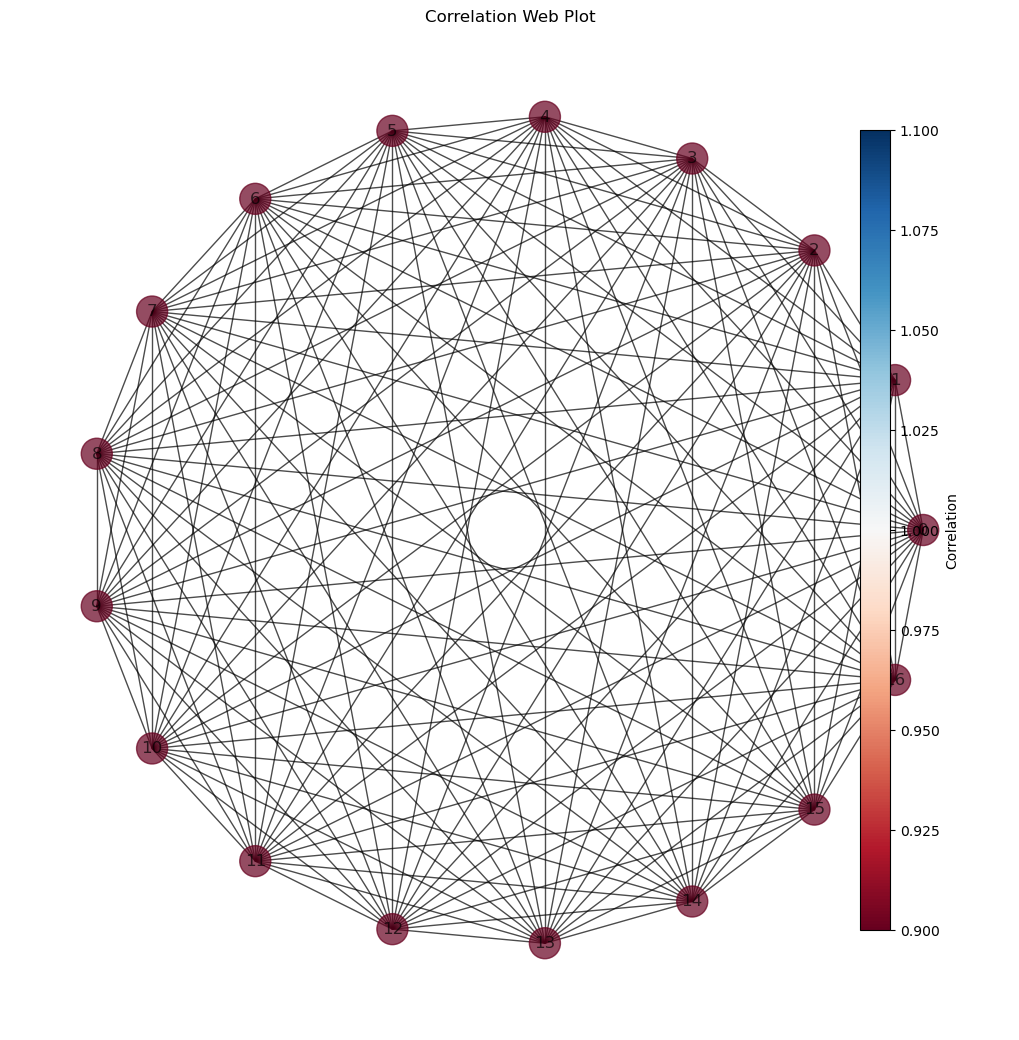

In [29]:
if len(G.nodes) > 0 and len(G.edges) > 0:
    # Try using nx.kamada_kawai_layout() for more stable layout
    pos = nx.kamada_kawai_layout(G)  # Alternative layout
    # pos = nx.spring_layout(G, k=0.15, iterations=200)  # You can also use this if you prefer

    # Extract diagonal values for node coloring
    node_colors = m.values.diagonal()  # Get diagonal elements of correlation matrix

    # Draw the entire network (edges and nodes)
    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, with_labels=True, node_size=500, node_color=node_colors, cmap='RdBu', alpha=0.7)

    # Create a color bar manually using axes
    sm = plt.cm.ScalarMappable(cmap='RdBu')
    sm.set_array(node_colors)  # Pass the node color array for scaling
    
    # Create an axes object for the color bar
    cbar_ax = plt.gca().inset_axes([0.85, 0.1, 0.03, 0.8])  # Position of the color bar
    plt.colorbar(sm, cax=cbar_ax, label='Correlation')

    plt.title('Correlation Web Plot')
    plt.show()
else:
    print("Graph has no valid nodes or edges.")

In [39]:
df = pd.read_csv('gtd_clean.csv', encoding='ISO-8859-1')

In [41]:
# Load the head
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170350 entries, 0 to 170349
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                170350 non-null  int64  
 1   eventid                   170350 non-null  float64
 2   year                      170350 non-null  int64  
 3   month                     170350 non-null  int64  
 4   day                       170350 non-null  int64  
 5   country                   170350 non-null  object 
 6   region                    170350 non-null  object 
 7   provstate                 170350 non-null  object 
 8   city                      170349 non-null  object 
 9   latitude                  170350 non-null  float64
 10  longitude                 170350 non-null  float64
 11  attack_type               170350 non-null  object 
 12  weapon_type               170350 non-null  object 
 13  target_type               170350 non-null  o

In [43]:
# Load the data2
file2 = pd.read_csv('gtd_clean_v2.csv', encoding='ISO-8859-1')

In [45]:
# Load the data2
file2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170350 entries, 0 to 170349
Data columns (total 39 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                170350 non-null  int64  
 1   eventid                   170350 non-null  float64
 2   year                      170350 non-null  int64  
 3   month                     170350 non-null  int64  
 4   day                       170350 non-null  int64  
 5   country                   170350 non-null  object 
 6   region                    170350 non-null  object 
 7   provstate                 170350 non-null  object 
 8   city                      170349 non-null  object 
 9   latitude                  170350 non-null  float64
 10  longitude                 170350 non-null  float64
 11  attack_type               170350 non-null  object 
 12  weapon_type               170350 non-null  object 
 13  target_type               170350 non-null  o

In [47]:
# Select the desired columns
tmp = file2[['intl_ideological_attack', 'intl_logistical_attack',
          'part_of_multiple_attacks', 'n_peace_keepers', 'net_migration',
          'refugee_asylum', 'refugee_origin', 'gdp_per_capita', 'arms_import',
          'arms_export', 'conflict_index', 'population', 'extended',
          'nwound', 'nkill', 'suicide_attack', 'attack_success']]


In [49]:
# Calculate the correlation matrix
# Calculate the correlation matrix while handling NaN or inf values
m = tmp.corr(method='pearson', min_periods=1)

In [57]:
# Group data by region and year, count attacks
grouped_data = file2.groupby(['region', 'year'])['eventid'].count().unstack().reset_index()

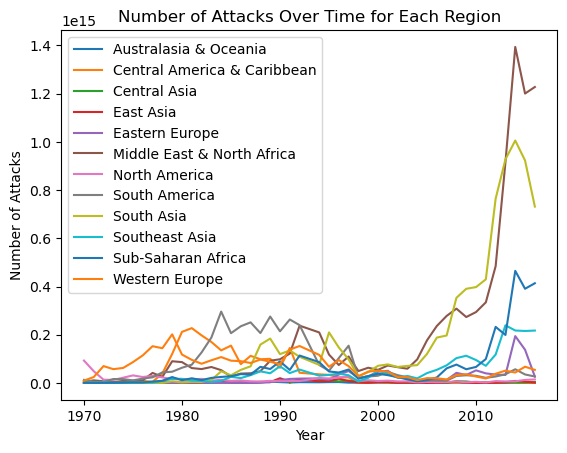

In [65]:
# Group by region and year, summing up the attack counts
tmp = file2.groupby(['region', 'year'])['eventid'].sum().reset_index()

# Plotting multiple line charts for each region
regions = tmp['region'].unique()

for region in regions:
    region_data = tmp[tmp['region'] == region]
    
    plt.plot(region_data['year'], region_data['eventid'], label=region)

plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks Over Time for Each Region')
plt.legend()
plt.show()

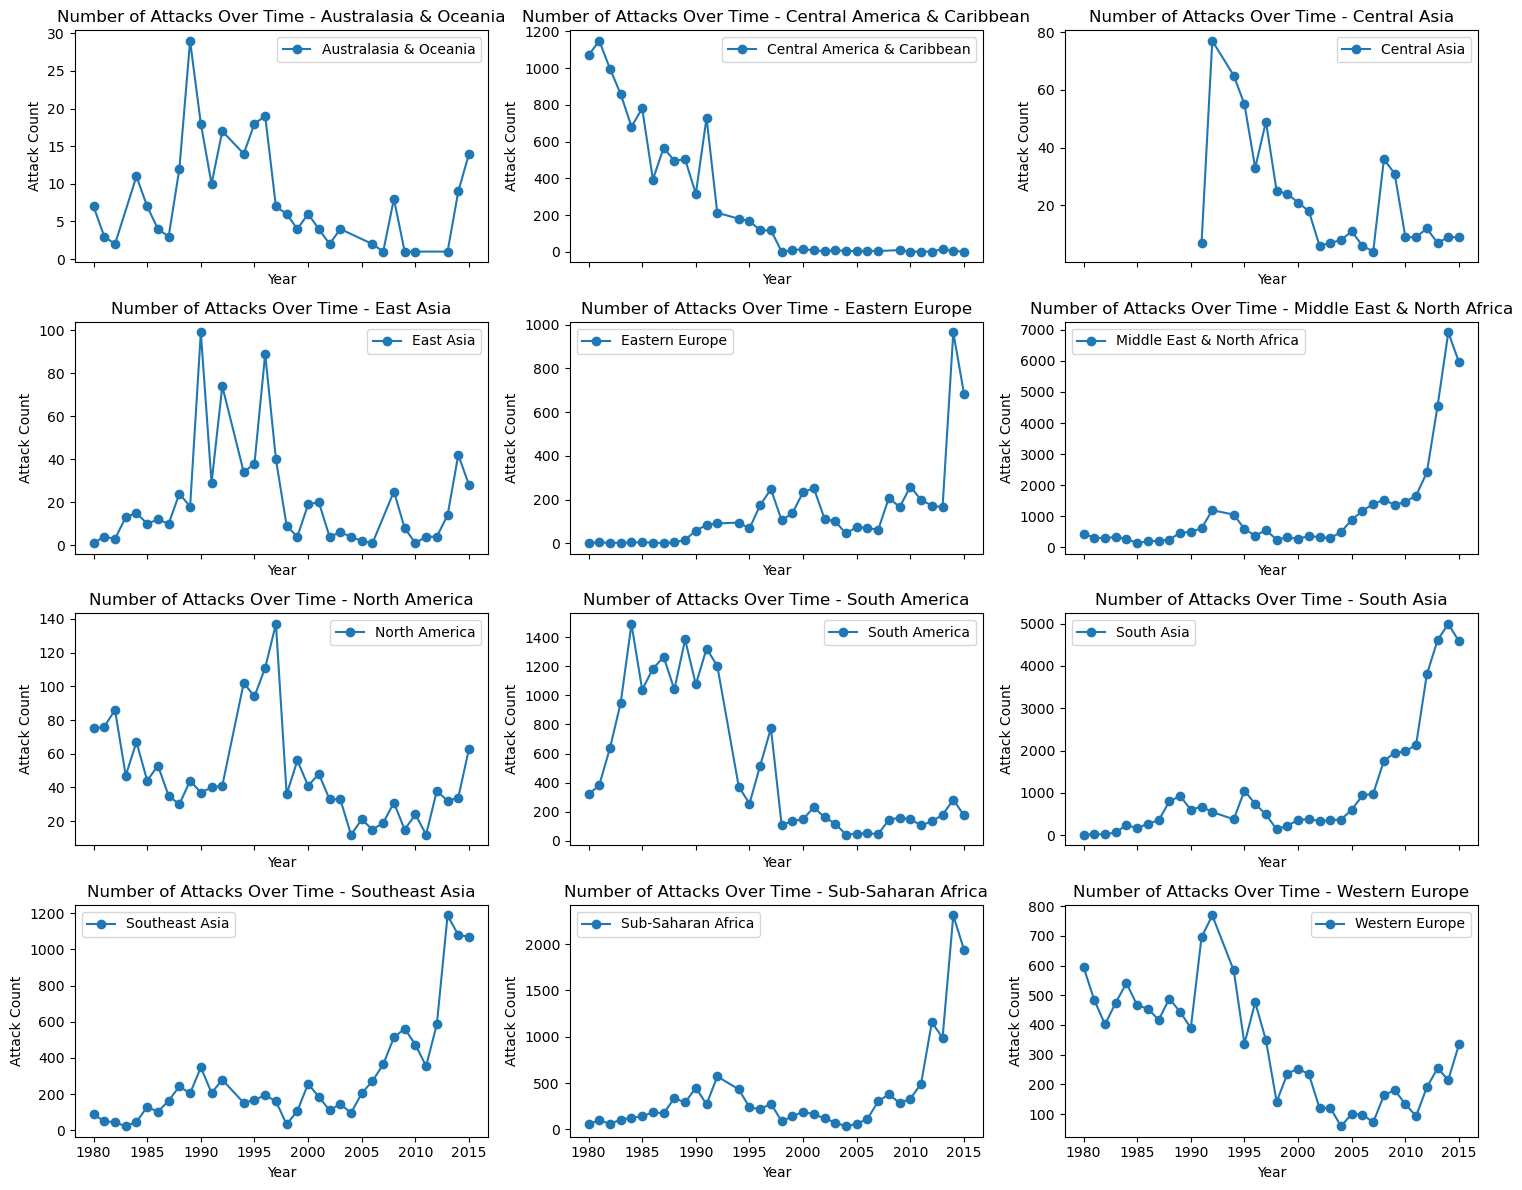

In [67]:

# Assuming 'df' is your DataFrame

# Filter data for the desired years
df_filtered = df[(df['year'] >= 1980) & (df['year'] <= 2015)]

# Group by region and year, then calculate the attack count
grouped_data = df_filtered.groupby(['region', 'year']).size().reset_index(name='attack_count')

# Get unique regions for subplot creation
regions = grouped_data['region'].unique()

# Define the number of plots per row
plots_per_row = 3

# Calculate the number of rows needed
num_rows = (len(regions) + plots_per_row - 1) // plots_per_row

# Create subplots with multiple rows and columns
fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(15, 3 * num_rows), sharex=True)

# Flatten the 2D array of axes for easier iteration
axes = axes.flatten()

# Iterate through each region and plot the data
for i, region in enumerate(regions):
    region_data = grouped_data[grouped_data['region'] == region]
    
    # Calculate the position in the subplot grid
    row = i // plots_per_row
    col = i % plots_per_row
    
    axes[i].plot(region_data['year'], region_data['attack_count'], marker='o', label=region)
    axes[i].set_title(f'Number of Attacks Over Time - {region}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Attack Count')
    axes[i].legend()

# Remove any empty subplots
for i in range(len(regions), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better readability
plt.tight_layout()
plt.show()


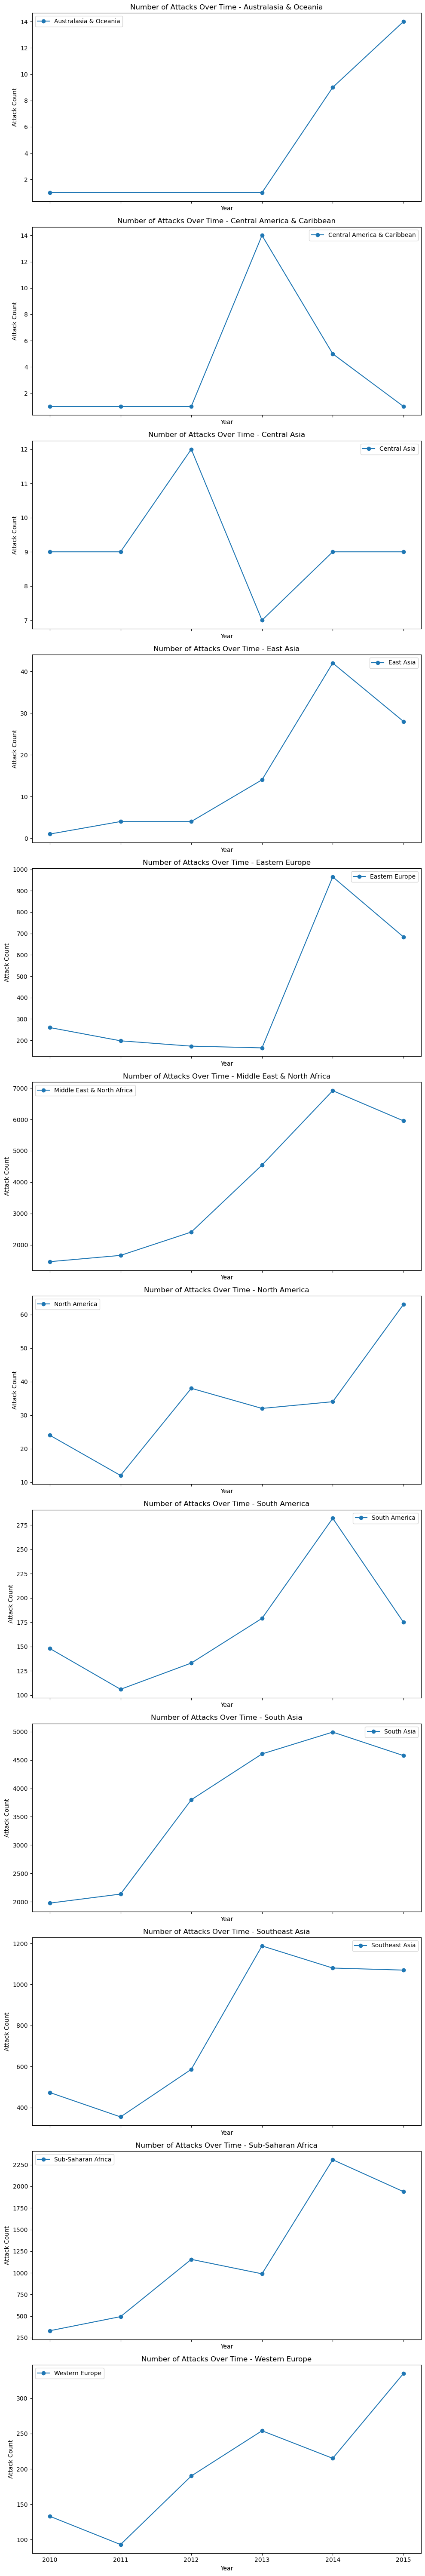

In [77]:
df_filtered = file2[(file2['year'] >= 2010) & (file2['year'] <= 2015)]

# Group by region and year, then calculate the attack count
grouped_data = df_filtered.groupby(['region', 'year']).size().reset_index(name='attack_count')

# Get unique regions for subplot creation
regions = grouped_data['region'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=len(regions), ncols=1, figsize=(10, 5 * len(regions)), sharex=True)

# Iterate through each region and plot the data
for i, region in enumerate(regions):
    region_data = grouped_data[grouped_data['region'] == region]
    axes[i].plot(region_data['year'], region_data['attack_count'], marker='o', label=region)
    axes[i].set_title(f'Number of Attacks Over Time - {region}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Attack Count')
    axes[i].legend()

# Adjust layout for better readability
plt.tight_layout()
plt.show()

C:\Users\254\AppData\Local\Temp\ipykernel_9080\16879445.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_boxplot, labels=top_10_groups)


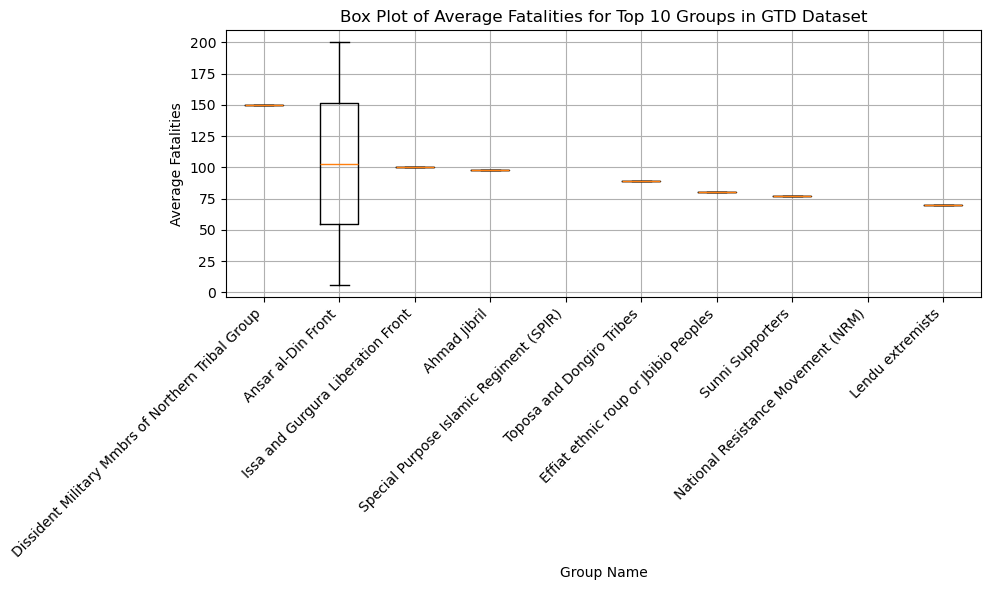

In [87]:
# Calculate the average fatalities for each group
avg_fatalities = file2.groupby("group_name")["nkill"].mean().sort_values(ascending=False)[:10]

# Extract the top 10 groups and their average fatalities
top_10_groups = avg_fatalities.index.to_list()

# Create a list of arrays for boxplot
data_for_boxplot = [file2[file2["group_name"] == group]["nkill"].values for group in top_10_groups]

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data_for_boxplot, labels=top_10_groups)
plt.xlabel("Group Name")
plt.ylabel("Average Fatalities")
plt.title("Box Plot of Average Fatalities for Top 10 Groups in GTD Dataset")
plt.grid(True)

# Customize the plot (optional)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
